<a href="https://colab.research.google.com/github/hamedmatari/machine-learening/blob/main/fit_line_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
!pip install -Uqq fastbook
import fastbook
# fastbook.setup_book()
from fastbook import *

from matplotlib import pyplot as plt

     |████████████████████████████████| 719 kB 5.2 MB/s 
     |████████████████████████████████| 1.2 MB 70.1 MB/s 
     |████████████████████████████████| 346 kB 57.9 MB/s 
     |████████████████████████████████| 4.2 MB 58.8 MB/s 
     |████████████████████████████████| 197 kB 75.8 MB/s 
     |████████████████████████████████| 60 kB 8.8 MB/s 
     |████████████████████████████████| 212 kB 72.5 MB/s 
     |████████████████████████████████| 140 kB 73.2 MB/s 
     |████████████████████████████████| 86 kB 6.6 MB/s 
     |████████████████████████████████| 1.1 MB 66.6 MB/s 
     |████████████████████████████████| 86 kB 5.4 MB/s 
     |████████████████████████████████| 596 kB 51.1 MB/s 
     |████████████████████████████████| 127 kB 27.1 MB/s 
     |████████████████████████████████| 144 kB 61.2 MB/s 
     |████████████████████████████████| 94 kB 2.9 MB/s 
     |████████████████████████████████| 271 kB 55.3 MB/s 
     |████████████████████████████████| 112 kB 12.0 MB/s 
     |█████████████████

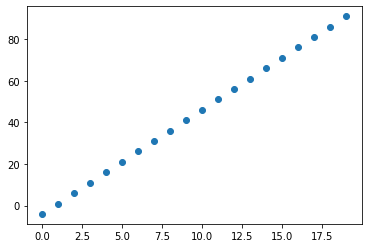

In [3]:
time = torch.arange(0,20).float();

# speed = 2*(time)**2 + 3*time + 50
speed  = -4 + 5*time
plt.scatter(time , speed)

In [4]:
def f(t , params):
  c , b = params
  return b*t + c

def show_preds(preds , ax=None):
  if ax is None:
    ax = plt.subplots()[1]

  ax.scatter(time , speed)
  ax.scatter(time , to_np(preds) , color='red')

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])
tensor([0.3367, 0.1288], requires_grad=True)
tensor([0.3367, 0.4655, 0.5943, 0.7231, 0.8519, 0.9807, 1.1095, 1.2384, 1.3672, 1.4960, 1.6248, 1.7536, 1.8824, 2.0112, 2.1400, 2.2688, 2.3976, 2.5265, 2.6553, 2.7841], grad_fn=<AddBackward0>)


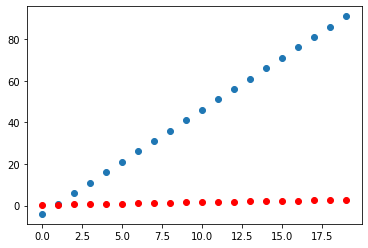

In [5]:
params = torch.randn(2).requires_grad_()
#print(time)
#print(params)
predictions = f(time , params)
#print(predictions)
show_preds(predictions , ax=None)

In [6]:
def mse(predictions , target):
  return ((target-predictions)**2).mean()

loss = mse(predictions , speed)
loss.backward()
params.grad


tensor([  -83.8792, -1120.7870])

In [7]:
lr = 1e-5
params.data -= lr * params.grad.data

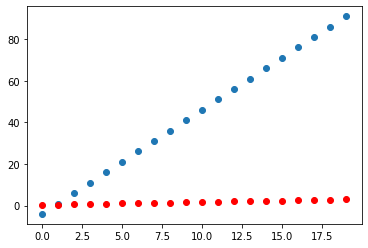

In [8]:
predictions = f(time , params)
show_preds(predictions , ax=None)


In [9]:
def apply_step ( params , print_loss=True , lr = 1e-5):
  preds = f(time , params)
  loss = mse(preds , speed)
  loss.backward()
  params.data -= lr* params.grad.data
  params.grad= None
  if print_loss is True:
     print(params)
     print(loss.item())


In [14]:
del params
params = (1*torch.randn(2)).requires_grad_()

tensor([-0.0457,  4.2187], requires_grad=True)
32.461021423339844
tensor([-0.0453,  4.2246], requires_grad=True)
31.76862144470215
tensor([-0.0450,  4.2304], requires_grad=True)
31.093135833740234
tensor([-0.0447,  4.2361], requires_grad=True)
30.434200286865234
tensor([-0.0443,  4.2417], requires_grad=True)
29.79155921936035
tensor([-0.0440,  4.2473], requires_grad=True)
29.164642333984375
tensor([-0.0437,  4.2528], requires_grad=True)
28.55316162109375
tensor([-0.0434,  4.2583], requires_grad=True)
27.956689834594727
tensor([-0.0431,  4.2637], requires_grad=True)
27.37485694885254
tensor([-0.0428,  4.2690], requires_grad=True)
26.80734634399414
tensor([-0.0425,  4.2742], requires_grad=True)
26.2537899017334
tensor([-0.0422,  4.2794], requires_grad=True)
25.713787078857422
tensor([-0.0419,  4.2845], requires_grad=True)
25.18705940246582
tensor([-0.0416,  4.2895], requires_grad=True)
24.67328453063965
tensor([-0.0413,  4.2945], requires_grad=True)
24.17214584350586
tensor([-0.0411,  4.

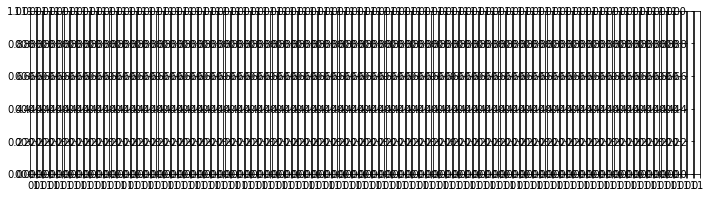

In [28]:
_,axs = plt.subplots(1,100, figsize=(12,3))
for i in range(100):
  ax =axs[i]
  show_res = i % 5 == True
  apply_step(params , print_loss=show_res , lr = 1e-5)
  preds = f(time , params)
  #show_preds(preds , ax)

In [36]:
#print(params)
def useParams(x):

  print(to_np(params)[1]*x+to_np(params))

useParams(4)

[17.245552 21.606773]
